เหลือทำ
สร้างโฟลออโต้
report photo,
model sum photo,


In [2]:
import os
from google.colab import drive
import numpy as np
import keras
import tensorflow as tf
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
import seaborn as sns
from tensorflow.keras.models import load_model

In [21]:
def organize_images(source_folder, destination_folder, images_per_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through each subfolder in the source folder
    for current_folder in os.listdir(source_folder):
        current_folder_path = os.path.join(source_folder, current_folder)

        # Check if the current path is a directory
        if os.path.isdir(current_folder_path):
            # Create a corresponding folder in the destination folder
            destination_folder_path = os.path.join(destination_folder, f"{current_folder}")

            if not os.path.exists(destination_folder_path):
                os.makedirs(destination_folder_path)
            else:
                # Clean the destination folder before moving new images
                existing_files = os.listdir(destination_folder_path)
                for file in existing_files:
                    file_path = os.path.join(destination_folder_path, file)
                    os.remove(file_path)

            # Get a list of all image files in the current subfolder
            image_files = [f for f in os.listdir(current_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

            # Iterate through the image files and organize them into the destination folder
            current_folder_count = 0
            for image_file in image_files:
                source_path = os.path.join(current_folder_path, image_file)
                destination_path = os.path.join(destination_folder_path, image_file)

                # Move the image file to the destination folder
                shutil.copy(source_path, destination_path)

                current_folder_count += 1

                # Break if the current folder count reaches the desired number of images
                if current_folder_count == images_per_folder:
                    break

# Construct the full file path
file_path = "/content/Data/"

source_folder = file_path
destination_folder = "/content/Data2/"
images_per_folder = 438 # Define the number of images per folder
epochs = 2  # Adjust the number of training epochs
learning_rate= 0.01
drop_out = 0.5
batch_size = 32
num_classes = 4
model_name = f'e{epochs}_d{int(drop_out*10)}'
project_path = '/content/drive/MyDrive/brain_tumor/'
history_path = os.path.join(project_path,'history')
model_path = os.path.join(project_path,'Model')

# Set random seeds for reproducibility
np.random.seed(42)
# tf.random.set_seed(42)
random.seed(42)

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/brain_tumor'

# Check if the file exists
if os.path.exists(file_path):
    print(f'The file Data exists in the directory.')
else:

    drive.mount('/content/drive')

    # Download the Kaggle dataset
    !kaggle datasets download -d thomasdubail/brain-tumors-256x256

    # Unzip the downloaded dataset
    !unzip brain-tumors-256x256.zip

    !pip install split-folders

    import splitfolders


    organize_images(source_folder, destination_folder, images_per_folder)

print(os.listdir(file_path))
class_names = ['pituitary', 'glioma', 'meningioma', 'normal']

images_in_folder = len(os.listdir('/content/Data2/normal/'))

if (images_per_folder != images_in_folder) or not os.path.exists('/content/Data2/normal/'):
    print(images_per_folder,images_in_folder)
    print('change')
    organize_images(source_folder, destination_folder, images_per_folder)

input_folder = "/content/Data2/"
splitfolders.ratio(input_folder, output='dataset',seed=42,ratio=(.7,.2,.1),group_prefix=None)



img_height = 128
img_width = img_height

# Create data generators for train, validation, and test data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/dataset/train', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('/content/dataset/val', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/dataset/test', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

# Get a batch of data from the generator
X_test_batch, y_test_batch = next(test_generator)

# X_test_batch is the batch of images
# y_test_batch is the batch of corresponding labels

# If you want to get all test data, you can loop through the generator
X_test = []
y_test = []

# Calculate the number of batches needed to cover all test data
num_batches = len(test_generator)
for i in range(num_batches):
    X_batch, y_batch = next(test_generator)
    X_test.append(X_batch)
    y_test.append(y_batch)

# Concatenate the batches to get the full X_test and y_test
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

if not os.path.exists(os.path.join(project_path,'history')):
  os.mkdir(history_path)
  os.mkdir(model_path)

The file Data exists in the directory.
['normal', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']
438 5
change


Copying files: 1752 files [00:00, 6717.62 files/s]

Found 1226 images belonging to 4 classes.


Found 352 images belonging to 4 classes.
Found 183 images belonging to 4 classes.


In [25]:
conv = [32,64,128]
dense = [128, num_classes]
model_name = f'c_{conv}_d_{dense}'
print(model_name)

# Define your CNN model
model = models.Sequential()
for c in range(len(conv)):
    if c == 0:
        model.add(layers.Conv2D(conv[c], (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    else:
        model.add(layers.Conv2D(conv[c], (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

for d in range(len(dense)):
    if d == len(dense) - 1:
        model.add(layers.Dense(num_classes, activation='softmax'))
    else:
        model.add(layers.Dense(dense[d], activation='relu'))

model.summary()

c_[32, 64, 128]_d_[128, 4]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPool

Epoch 1/2
39/39 [==============================] - 50s 1s/step - loss: 1.4095 - accuracy: 0.3042 - val_loss: 1.2844 - val_accuracy: 0.4347
Epoch 2/2
6/6 [==============================] - 3s 441ms/step - loss: 0.9927 - accuracy: 0.6448
Test accuracy: 0.6448087692260742


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 1s 230ms/step


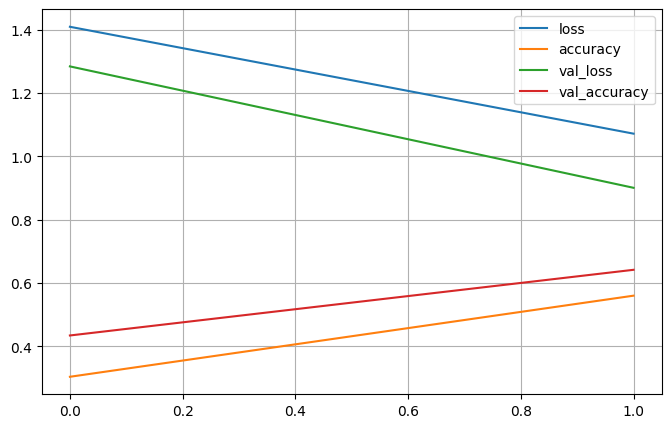

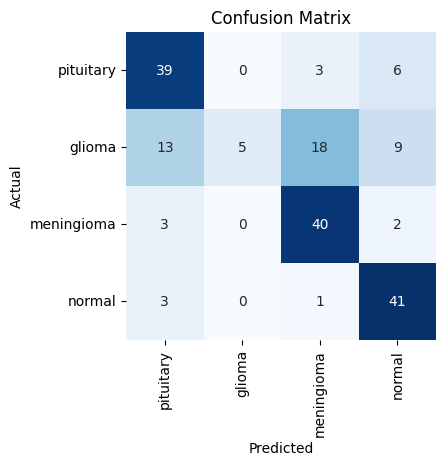

Classification Report:
----------------------
               precision    recall  f1-score   support

   pituitary       0.67      0.81      0.74        48
      glioma       1.00      0.11      0.20        45
  meningioma       0.65      0.89      0.75        45
      normal       0.71      0.91      0.80        45

    accuracy                           0.68       183
   macro avg       0.76      0.68      0.62       183
weighted avg       0.75      0.68      0.62       183



In [23]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)
np.save(f'{history_path}{model_name}.npy',history.history)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Make predictions on new data if needed
# predictions = model.predict(new_data)

model.save(f'{model_path}{model_name}.keras')
model.save(f'{model_path}{model_name}.h5')



predictions = model.predict(X_test, batch_size=batch_size)
y_pred_class = np.argmax(predictions, axis=1)
y_pred_class_hot = keras.utils.to_categorical(y_pred_class,num_classes)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
clr = classification_report(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes), target_names=class_names)



err_hist = history.history
pd.DataFrame(err_hist).plot(figsize=(8, 5))
plt.grid(True)

plt.show()



plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(num_classes) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(num_classes) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix55.png')
plt.show()
print("Classification Report:\n----------------------\n", clr)

6/6 [==============================] - 2s 235ms/step
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


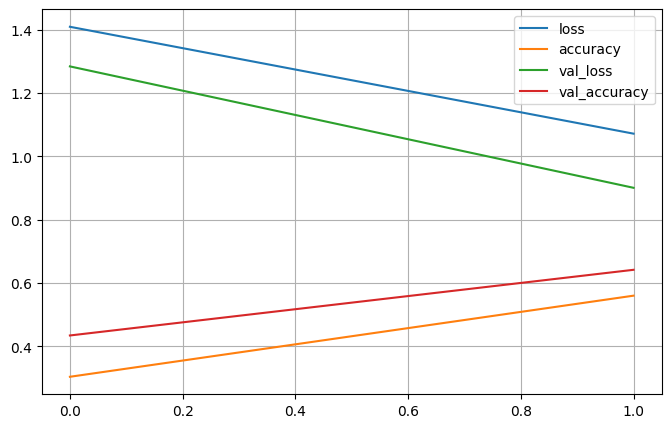

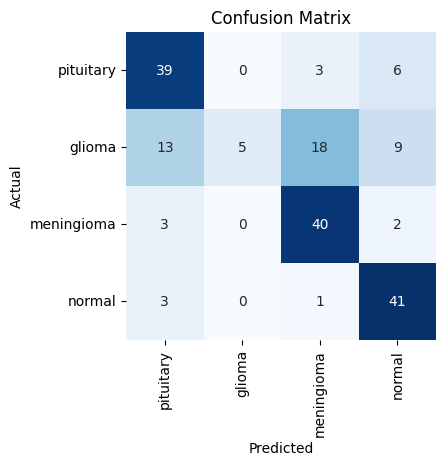

Classification Report:
----------------------
               precision    recall  f1-score   support

   pituitary       0.67      0.81      0.74        48
      glioma       1.00      0.11      0.20        45
  meningioma       0.65      0.89      0.75        45
      normal       0.71      0.91      0.80        45

    accuracy                           0.68       183
   macro avg       0.76      0.68      0.62       183
weighted avg       0.75      0.68      0.62       183



Predicted,0,1,2,3,All
True,,,,,
0,39,0,3,6,48
1,13,5,18,9,45
2,3,0,40,2,45
3,3,0,1,41,45
All,58,5,62,58,183


In [24]:
# Load the saved model
loaded_model = load_model(f'{model_path}{model_name}.h5')

# Now, you can use loaded_model to make predictions
predictions = loaded_model.predict(X_test, batch_size=batch_size)
y_pred_class = np.argmax(predictions, axis=1)
y_pred_class_hot = keras.utils.to_categorical(y_pred_class,num_classes)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
clr = classification_report(np.argmax(y_test,axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes), target_names=class_names)

loaded_history = np.load(f'{history_path}{model_name}.npy', allow_pickle='TRUE').item()

# Assuming loaded_history is a dictionary with keys 'loss', 'accuracy', 'val_loss', 'val_accuracy'
print(loaded_history.keys())

# Plot the training and validation metrics
df = pd.DataFrame(loaded_history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.show()


plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(num_classes) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(num_classes) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix55.png')
plt.show()
print("Classification Report:\n----------------------\n", clr)

pd.crosstab(np.argmax(y_test,axis=1), y_pred_class, rownames=['True'], colnames=['Predicted'], margins=True)


In this case, Recall gets higher importance than the Precision. Beacuse,if our model predicts the False Neagtive which means the person has not a Brain Tumor, but actually it has a Brain Tumor, then it will become more dangerous to the health of person.Hence,by minimizing the False Negative we can get higher Recall.
Recall is defined as Out of Total Prediceted Labels how many Did we predict correctly.
Recall = True Positive/(True Positive + False Negative)